In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:.4f}".format
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,10)
plt.style.use("dark_background")
import datetime as dt
import statsmodels.api as sm
import yfinance as yf

In [2]:
cons = pd.read_pickle("cons.pkl")
cons

,OPEN_ZF,HIGH_ZF,LOW_ZF,CLOSE_ZF,VOLUME_ZF,VWAP_ZF,OPEN_ZN,HIGH_ZN,LOW_ZN,CLOSE_ZN,...,OPEN,HIGH,LOW,CLOSE,VOLUME,VWAP,IEF,ZN,ZF,IEF_SYN
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-04 09:31:00,126.0781,126.0859,126.0781,126.0859,878,126.0793,137.8281,137.8281,137.8125,137.8281,...,119.6600,119.6800,119.6450,119.6470,7368,119.6551,-0.0002,-0.0000,-0.0000,-0.0000
2021-01-04 09:32:00,126.0781,126.0859,126.0781,126.0781,141,126.0787,137.8125,137.8281,137.8125,137.8125,...,119.6400,119.6800,119.6400,119.6500,10349,119.6507,-0.0000,-0.0000,-0.0000,-0.0000
2021-01-04 09:33:00,126.0781,126.0859,126.0781,126.0859,4568,126.0859,137.8125,137.8281,137.8125,137.8281,...,119.6450,119.6600,119.6450,119.6500,32164,119.6514,0.0000,0.0001,0.0001,0.0001
2021-01-04 09:34:00,126.0859,126.0859,126.0781,126.0859,2910,126.0859,137.8281,137.8438,137.8125,137.8281,...,119.6500,119.6700,119.6500,119.6700,8621,119.6608,0.0001,-0.0000,0.0000,-0.0000
2021-01-04 09:35:00,126.0859,126.0938,126.0859,126.0938,114,126.0929,137.8281,137.8594,137.8281,137.8594,...,119.6718,119.6900,119.6600,119.6812,4912,119.6763,0.0001,0.0001,0.0001,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29 15:56:00,121.8359,121.8359,121.8281,121.8281,13,121.8353,131.1250,131.1250,131.1094,131.1094,...,115.1400,115.1500,115.1200,115.1200,89481,115.1372,-0.0001,-0.0001,-0.0001,-0.0001
2021-11-29 15:57:00,121.8281,121.8359,121.8281,121.8359,268,121.8348,131.1094,131.1250,131.1094,131.1250,...,115.1250,115.1300,115.1200,115.1200,168507,115.1275,-0.0001,-0.0000,-0.0000,-0.0000
2021-11-29 15:58:00,121.8281,121.8281,121.8281,121.8281,3,121.8281,131.1094,131.1094,131.1094,131.1094,...,115.1200,115.1350,115.1200,115.1300,224911,115.1259,-0.0000,-0.0001,-0.0001,-0.0001


<AxesSubplot:xlabel='Timestamp'>

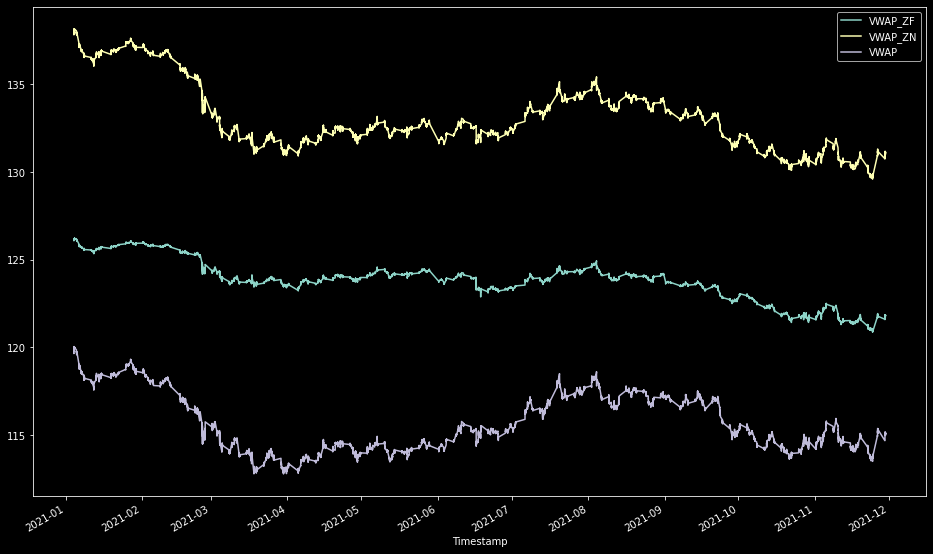

In [3]:
cons[["VWAP_ZF", "VWAP_ZN", "VWAP"]].plot()

In [4]:
cons["IEF"] = np.log(cons["VWAP"]/cons["VWAP"].shift(1))
cons["ZF"] = np.log(cons["VWAP_ZF"]/cons["VWAP_ZF"].shift(1))
cons["ZN"] = np.log(cons["VWAP_ZN"]/cons["VWAP_ZN"].shift(1))
cons.dropna(inplace=True)

In [5]:
res = sm.OLS(cons["IEF"], sm.add_constant(cons[["ZF", "ZN"]])).fit()
res.summary()

/Users/plee/miniconda3/envs/finmath/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IEF   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                 1.354e+05
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        21:24:05   Log-Likelihood:             7.0905e+05
No. Observations:               87971   AIC:                        -1.418e+06
Df Residuals:                   87968   BIC:                        -1.418e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.71e-07   2.58e-07      0.664      0.507   -3.34e-07    6.76e-07
ZF             0.3308      0.007     50.586      0.000       0.318       0.344
ZN             0.8501      0.004    219.637      0.000       0.843       0.858
==============================================================================
Omnibus:                   154965.774   Durbin-Watson:                   2.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3342552183.159
Skew:                          11.430   Prob(JB):                         0.00
Kurtosis:                     957.664   Cond. No.                     2.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
cons[["ZF", "ZN"]]

,ZF,ZN
Timestamp,,
2021-01-04 09:32:00,-0.0000,-0.0000
2021-01-04 09:33:00,0.0001,0.0001
2021-01-04 09:34:00,0.0000,-0.0000
2021-01-04 09:35:00,0.0001,0.0001
2021-01-04 09:36:00,0.0000,0.0001
...,...,...
2021-11-29 15:56:00,-0.0001,-0.0001
2021-11-29 15:57:00,-0.0000,-0.0000
2021-11-29 15:58:00,-0.0001,-0.0001


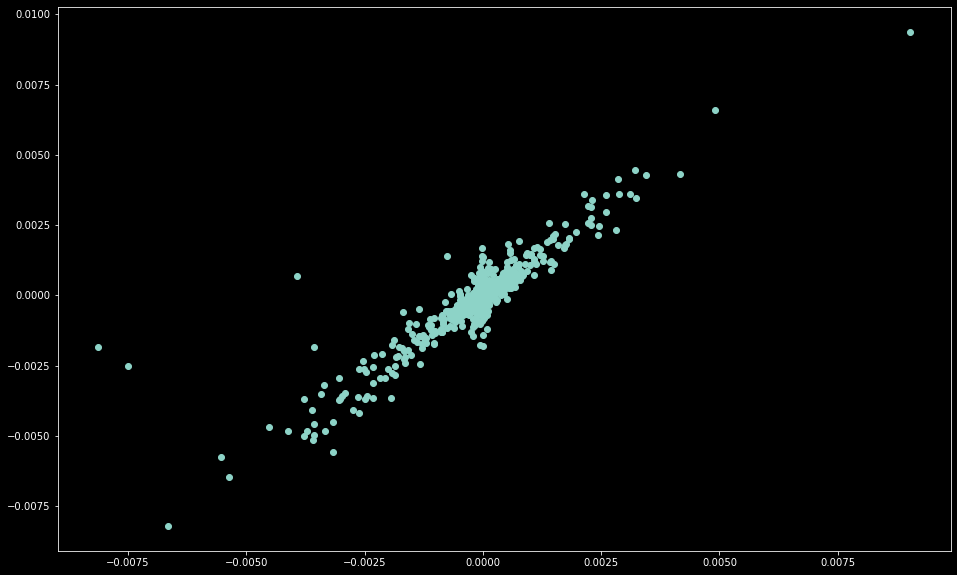

In [7]:
cons["IEF_SYN"] = cons[["ZF", "ZN"]] @ res.params[1:]
cons["CLOSE_SYN"] = cons[["CLOSE_ZF", "CLOSE_ZN"]].values @ res.params[1:] / sum(res.params[1:])

plt.scatter(cons["IEF_SYN"], cons["IEF"])

In [8]:
cons[["IEF", "IEF_SYN", "ZF", "ZN"]].corr()

,IEF,IEF_SYN,ZF,ZN
IEF,1.0000,0.8688,0.7877,0.8647
IEF_SYN,0.8688,1.0000,0.9066,0.9953
ZF,0.7877,0.9066,1.0000,0.8613
ZN,0.8647,0.9953,0.8613,1.0000


In [26]:
def strat(df, price):
    arbitrage = df.copy(deep=True)
    arbitrage['SYN Move'] = np.where(arbitrage['IEF_SYN']>0,1,-1)
    # 1 means upward trend, -1 means downward trend
    arbitrage['IEF Move'] = np.where(arbitrage['IEF']>0,1,-1)
    arbitrage['Signal'] = arbitrage['SYN Move'] - arbitrage['IEF Move']
    arbitrage['Long']  = np.where(arbitrage['Signal']==2,1,0)
    arbitrage['Sell']  = np.where(arbitrage['Long']-arbitrage['Long'].shift(1)==-1,1,0)
    arbitrage['Long_'] = np.where(arbitrage['Long']-arbitrage['Long'].shift(1)==1,-1,0)
    arbitrage['Action'] = arbitrage['Long_']+arbitrage['Sell']

    cs = sum(arbitrage['Action'])
    # cs = 0
    if cs and not(arbitrage["Action"][-1]):
        arbitrage['Action'][-1] = -cs
    elif cs and arbitrage["Action"][-1]:
        arbitrage["Action"][-1] = 0
    cs = sum(arbitrage["Action"])
    # display(np.array(arbitrage['Action']))
    # suppose every time we enter with 10000 ETF shares
    
    arbitrage['Cash Flow'] = arbitrage['Action']*arbitrage[price]
    arbitrage['Position'] = arbitrage['Action'].cumsum()
    arbitrage['Day_PnL'] = arbitrage['Cash Flow'].cumsum() - arbitrage['Position'] * arbitrage[price]
    
    pl = sum(arbitrage['Cash Flow'])
    # display(arbitrage.head(20))
    # print('To Capture All Arbitrage Opportunities in A Day with 10000 ETF shares, the Profits are:')
    # display(np.sum(arbitrage['Cash Flow'])*10000)
    return arbitrage, cs, pl

sub = cons[["IEF", "IEF_SYN", "VWAP", "CLOSE", "CLOSE_SYN"]]#["2021-09-01":]

results = pd.DataFrame()
debug, profit = [], []

for date, day_df in sub.groupby(sub.index.date):
    st, cs, pl = strat(day_df, "CLOSE")
    results = pd.concat([results, st])
    debug.append(cs)
    profit.append(pl)

results.head()

<ipython-input-26-326374159834>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arbitrage["Action"][-1] = 0
<ipython-input-26-326374159834>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arbitrage['Action'][-1] = -cs


,IEF,IEF_SYN,VWAP,CLOSE,CLOSE_SYN,SYN Move,IEF Move,Signal,Long,Sell,Long_,Action,Cash Flow,Position,Day_PnL
Timestamp,,,,,,,,,,,,,,,
2021-01-04 09:32:00,-0.0000,-0.0000,119.6507,119.6500,134.5255,-1,-1,0,0,0,0,0,0.0000,0,0.0000
2021-01-04 09:33:00,0.0000,0.0001,119.6514,119.6500,134.5389,1,1,0,0,0,0,0,0.0000,0,0.0000
2021-01-04 09:34:00,0.0001,-0.0000,119.6608,119.6700,134.5389,-1,1,-2,0,0,0,0,0.0000,0,0.0000
2021-01-04 09:35:00,0.0001,0.0001,119.6763,119.6812,134.5636,1,1,0,0,0,0,0,0.0000,0,0.0000
2021-01-04 09:36:00,0.0001,0.0001,119.6877,119.7050,134.5658,1,1,0,0,0,0,0,0.0000,0,0.0000


2.1071510000010534


Text(0.5, 1.0, 'Algorithm Performance per Share of IEF')

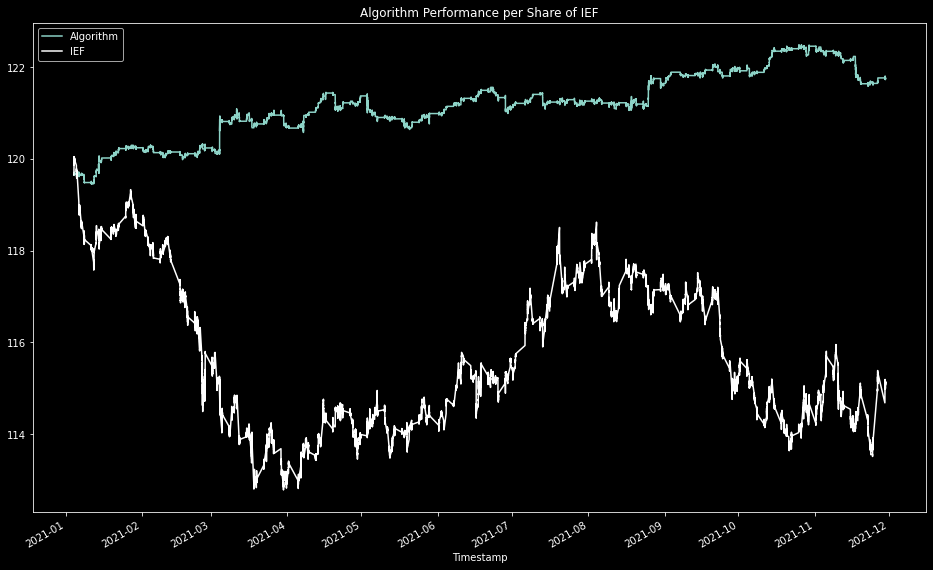

In [32]:
print(results["Cash Flow"].sum())
results["pl"] = results["Cash Flow"].cumsum() - results["Position"]*results["CLOSE"] + results["CLOSE"][0]
results["pl"].plot(label="Algorithm")
results["CLOSE"].plot(label="IEF", color='w')
plt.legend()
plt.title("Algorithm Performance per Share of IEF")

In [10]:
results[results["Action"]!=0].head(20)

,IEF,IEF_SYN,VWAP,CLOSE,CLOSE_SYN,SYN Move,IEF Move,Signal,Long,Sell,Long_,Action,Cash Flow,Position,Day_PnL,pl
Timestamp,,,,,,,,,,,,,,,,
2021-01-04 10:03:00,-0.0000,0.0000,119.8293,119.8264,134.6511,1,-1,2,1,0,-1,-1,-119.8264,-1,0.0000,0.0000
2021-01-04 10:04:00,0.0000,-0.0000,119.8295,119.8200,134.6511,-1,1,-2,0,1,0,1,119.8200,0,-0.0064,-0.0064
2021-01-04 10:29:00,-0.0000,0.0000,119.8751,119.8789,134.6870,1,-1,2,1,0,-1,-1,-119.8789,-1,-0.0064,-0.0064
2021-01-04 10:30:00,0.0001,0.0001,119.8880,119.8900,134.6892,1,1,0,0,1,0,1,119.8900,0,0.0047,0.0047
2021-01-04 10:46:00,-0.0000,0.0000,119.9102,119.9012,134.6892,1,-1,2,1,0,-1,-1,-119.9012,-1,0.0047,0.0047
2021-01-04 10:48:00,0.0000,-0.0000,119.9091,119.9063,134.7005,-1,1,-2,0,1,0,1,119.9063,0,0.0098,0.0098
2021-01-04 10:55:00,-0.0000,0.0000,119.9193,119.9136,134.7026,1,-1,2,1,0,-1,-1,-119.9136,-1,0.0098,0.0098
2021-01-04 10:57:00,-0.0000,-0.0000,119.9110,119.9100,134.6914,-1,-1,0,0,1,0,1,119.9100,0,0.0062,0.0062
2021-01-04 11:00:00,-0.0000,0.0000,119.9118,119.9064,134.6914,1,-1,2,1,0,-1,-1,-119.9064,-1,0.0062,0.0062


<AxesSubplot:>

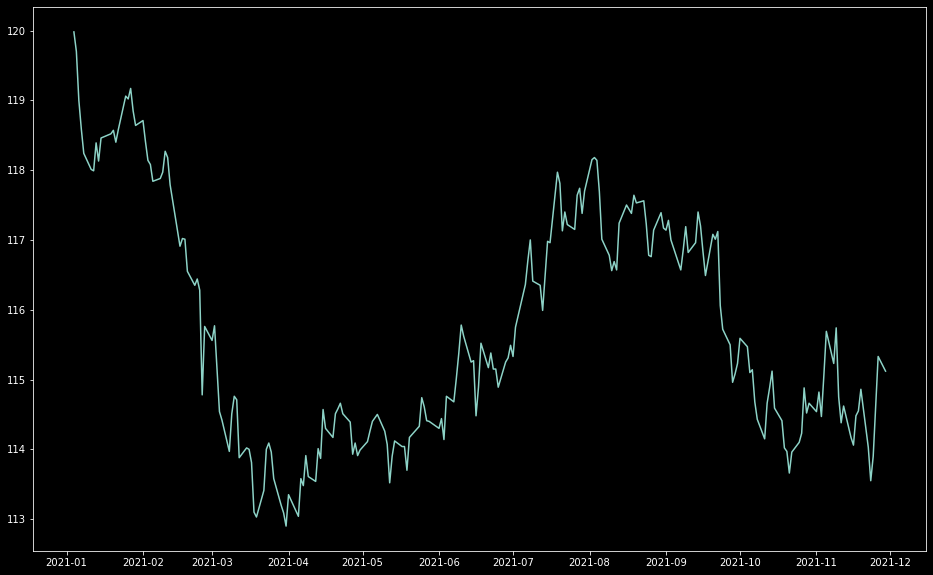

In [42]:
daily_ief = results["CLOSE"].groupby(results.index.date).last()
daily_ief.plot()

<AxesSubplot:>

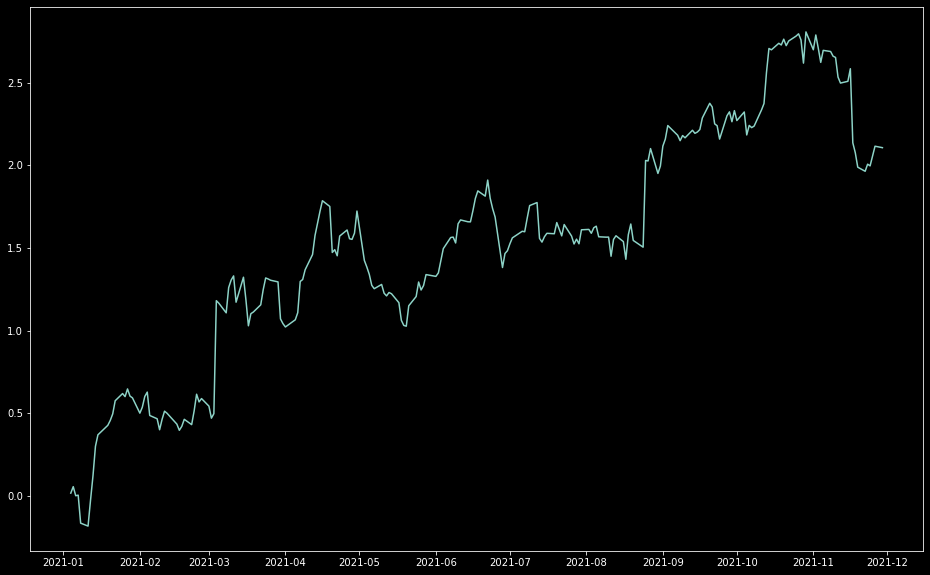

In [43]:
daily = results["Cash Flow"].cumsum().groupby(results.index.date).last()
daily.plot()

In [54]:
temp_ret = pd.concat([daily+daily_ief[0], daily_ief], axis=1)

temp_ret["IEF_RET"] = np.log(temp_ret["CLOSE"]/temp_ret["CLOSE"].shift(1))
temp_ret.dropna(inplace=True)

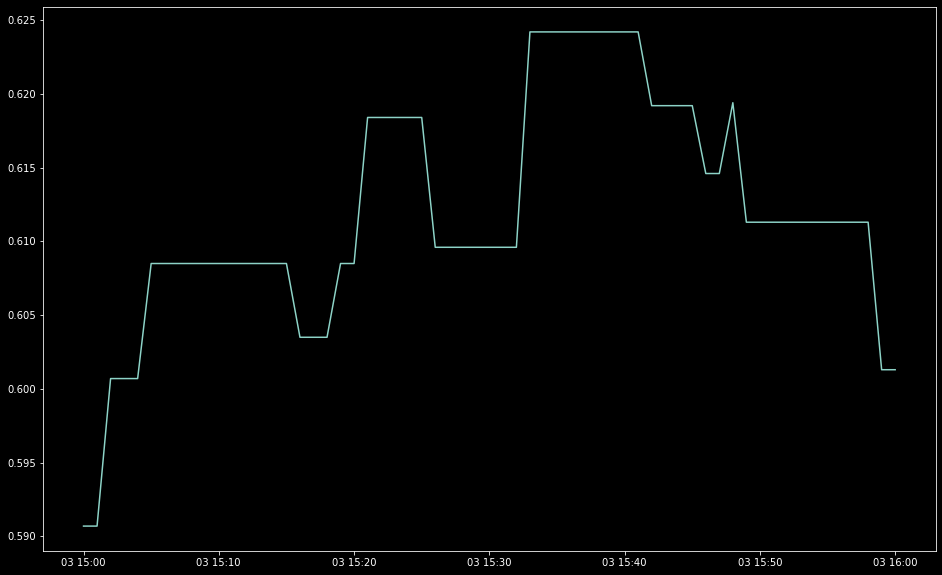

In [12]:
det = results[("2021-02-03 15:00:00"<= results.index) & (results.index<"2021-02-04")]
plt.plot(det["pl"])

In [13]:
det

,IEF,IEF_SYN,VWAP,CLOSE,CLOSE_SYN,SYN Move,IEF Move,Signal,Long,Sell,Long_,Action,Cash Flow,Position,Day_PnL,pl
Timestamp,,,,,,,,,,,,,,,,
2021-02-03 15:00:00,-0.0001,-0.0001,118.1395,118.1269,133.7043,-1,-1,0,0,0,0,0,0.0000,0,0.0542,0.5907
2021-02-03 15:01:00,-0.0001,0.0001,118.1336,118.1400,133.7156,1,-1,2,1,0,-1,-1,-118.1400,-1,0.0542,0.5907
2021-02-03 15:02:00,0.0001,0.0000,118.1462,118.1500,133.7268,1,1,0,0,1,0,1,118.1500,0,0.0642,0.6007
2021-02-03 15:03:00,0.0000,-0.0000,118.1472,118.1400,133.7156,-1,1,-2,0,0,0,0,0.0000,0,0.0642,0.6007
2021-02-03 15:04:00,-0.0000,0.0000,118.1449,118.1472,133.7290,1,-1,2,1,0,-1,-1,-118.1472,-1,0.0642,0.6007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-03 15:56:00,-0.0000,-0.0000,118.1373,118.1400,133.7177,-1,-1,0,0,0,0,0,0.0000,0,0.0748,0.6113
2021-02-03 15:57:00,-0.0000,-0.0001,118.1340,118.1250,133.7065,-1,-1,0,0,0,0,0,0.0000,0,0.0748,0.6113
2021-02-03 15:58:00,-0.0001,0.0000,118.1252,118.1300,133.7065,1,-1,2,1,0,-1,-1,-118.1300,-1,0.0748,0.6113


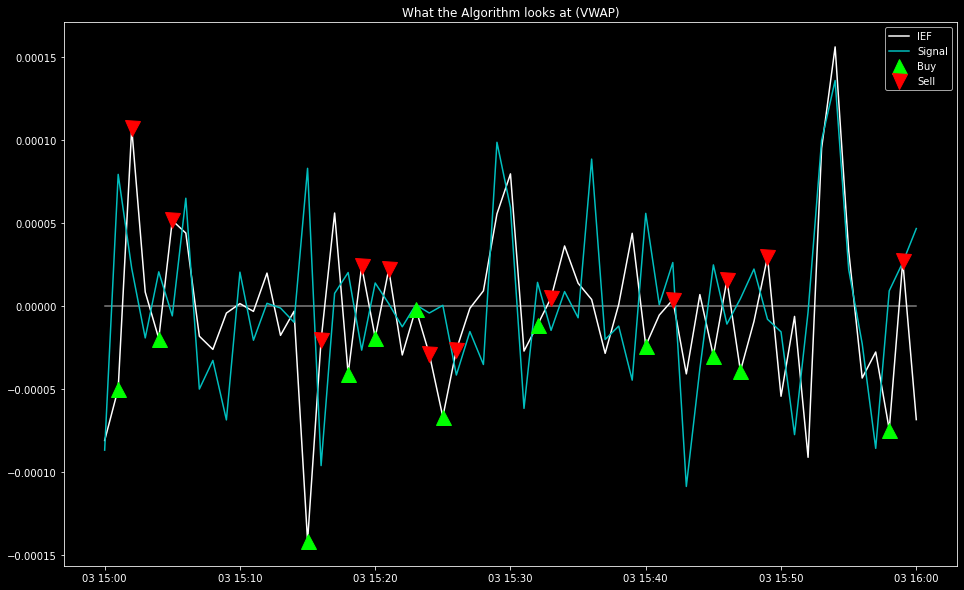

In [19]:
fig, axs = plt.subplots()

axs.plot([min(det.index), max(det.index)], [0,0], color='gray')

axs.plot(det["IEF"], color="w", label="IEF")
axs.plot(det["IEF_SYN"], color="c", label="Signal")

axs.plot(det[det['Action'] == -1].index, 
         det[det['Action'] == -1]['IEF'],
         '^', markersize = 15, color ='lime', label = 'Buy', alpha=1)
axs.plot(det[det['Action'] == 1].index, 
         det[det['Action'] == 1]['IEF'],
         'v', markersize = 15, color ='r', label = 'Sell', alpha=1)

plt.title("What the Algorithm looks at (VWAP)")
plt.legend()

plt.show()

<ipython-input-18-abbad0ccff00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  det["ief_sum"] = det["IEF"].cumsum() - det["IEF"][0]
<ipython-input-18-abbad0ccff00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  det["sig_sum"] = det["IEF_SYN"].cumsum() - det["IEF_SYN"][0]
<ipython-input-18-abbad0ccff00>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

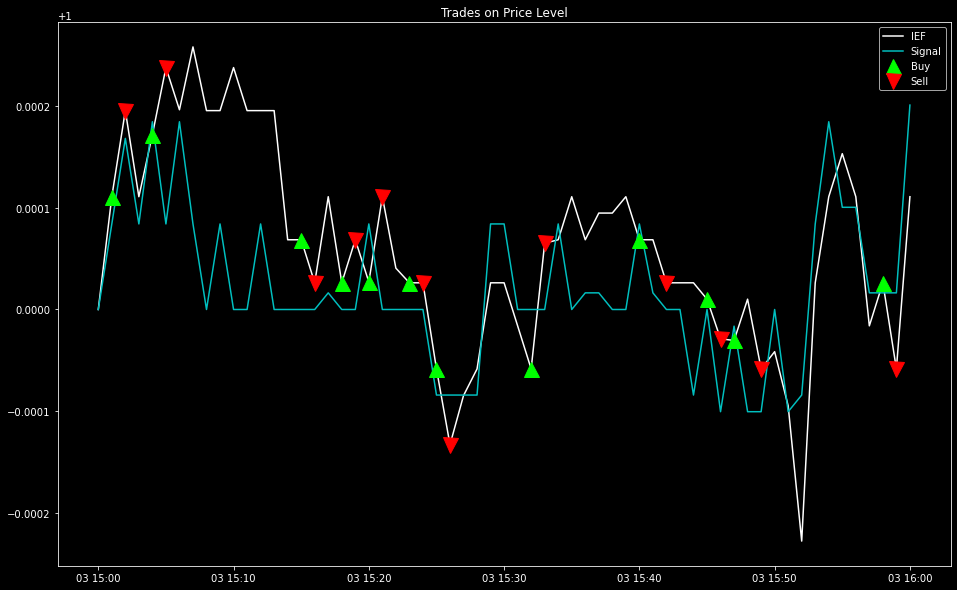

In [18]:
fig, axs = plt.subplots()

det["ief_sum"] = det["IEF"].cumsum() - det["IEF"][0]
det["sig_sum"] = det["IEF_SYN"].cumsum() - det["IEF_SYN"][0]

det["ief_sum"] = det["CLOSE"] / det["CLOSE"][0]
det["sig_sum"] = det["CLOSE_SYN"] / det["CLOSE_SYN"][0]

axs.plot(det["ief_sum"], color="w", label="IEF")
axs.plot(det["sig_sum"], color="c", label="Signal")

axs.plot(det[det['Action'] == -1].index, 
         det[det['Action'] == -1]['ief_sum'],
         '^', markersize = 15, color ='lime', label = 'Buy', alpha=1)
axs.plot(det[det['Action'] == 1].index, 
         det[det['Action'] == 1]['ief_sum'],
         'v', markersize = 15, color ='r', label = 'Sell', alpha=1)

plt.title("Trades on Price Level")
plt.legend()

plt.show()

<ipython-input-21-a24ffaad2523>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  det["ser"] = det["Day_PnL"] - det["Day_PnL"][0]


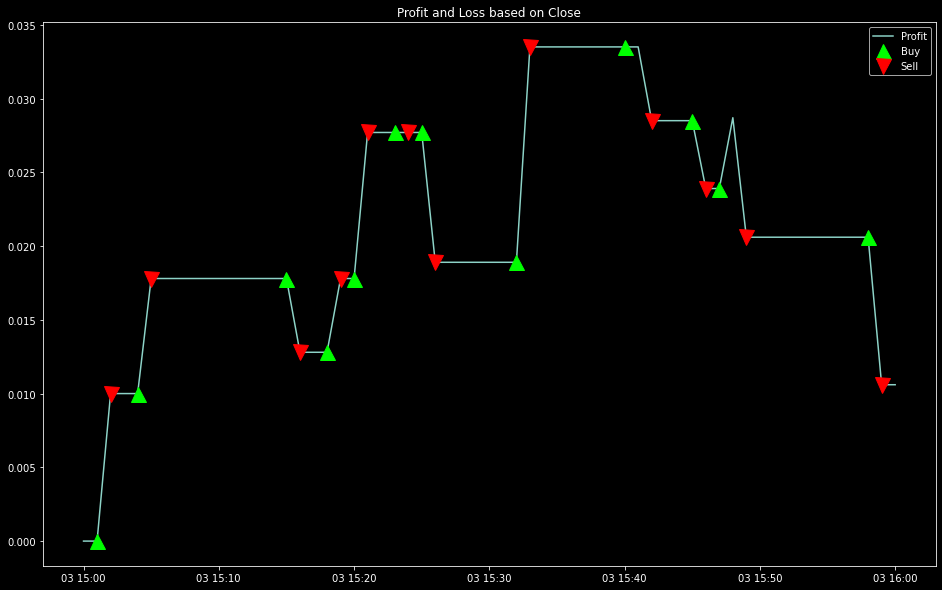

In [21]:
fig, axs = plt.subplots()

det["ser"] = det["Day_PnL"] - det["Day_PnL"][0]

axs.plot(det["ser"], label="Profit")

axs.plot(det[det['Action'] == -1].index, 
         det[det['Action'] == -1]['ser'],
         '^', markersize = 15, color ='lime', label = 'Buy', alpha=1)
axs.plot(det[det['Action'] == 1].index, 
         det[det['Action'] == 1]['ser'],
         'v', markersize = 15, color ='r', label = 'Sell', alpha=1)

plt.title("Profit and Loss based on Close")
plt.legend()

In [22]:
spx = yf.download(tickers = "^GSPC", start = "2021-01-01", end = "2021-11-30", interval = "1d")
spx["ret_spx"] = np.log(spx["Adj Close"]/spx["Adj Close"].shift(1))
spx.dropna(inplace=True)
spx

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,ret_spx
Date,,,,,,,
2021-01-05,3698.0200,3737.8301,3695.0701,3726.8601,3726.8601,4582620000,0.0071
2021-01-06,3712.2000,3783.0400,3705.3401,3748.1399,3748.1399,6049970000,0.0057
2021-01-07,3764.7100,3811.5500,3764.7100,3803.7900,3803.7900,5080870000,0.0147
2021-01-08,3815.0500,3826.6899,3783.6001,3824.6799,3824.6799,4764180000,0.0055
2021-01-11,3803.1399,3817.8601,3789.0200,3799.6101,3799.6101,4450500000,-0.0066
...,...,...,...,...,...,...,...
2021-11-22,4712.0000,4743.8301,4682.1699,4682.9399,4682.9399,3206280000,-0.0032
2021-11-23,4678.4800,4699.3901,4652.6602,4690.7002,4690.7002,3428780000,0.0017
2021-11-24,4675.7798,4702.8701,4659.8901,4701.4600,4701.4600,2464040000,0.0023


In [23]:
algo = (daily + results["CLOSE"][0]).to_frame("close")
algo["ret_algo"] = np.log(algo["close"]/algo["close"].shift(1))
algo.dropna(inplace=True)
algo

,close,ret_algo
2021-01-05,119.7055,0.0003
2021-01-06,119.6505,-0.0005
2021-01-07,119.6540,0.0000
2021-01-08,119.4846,-0.0014
2021-01-11,119.4668,-0.0001
...,...,...
2021-11-22,121.6144,-0.0002
2021-11-23,121.6573,0.0004
2021-11-24,121.6470,-0.0001
2021-11-26,121.7661,0.0010


In [24]:
def portstats_bm(v, bm, nper=12):
    """Arguments:
    v: pd.DataFrame containing rows of returns OR
    bm: pd.DataFrame containing rows of returns
    nper: int for annualization
    """
    try:
        c = v.columns
    except AttributeError:
        c = ["Portfolio"]
    
    mu = v.mean() * nper
    sig = v.std() * np.sqrt(nper)
    
    alpha, rsq, mae, tr, ir, reg = [], [], [], [], [], []
    beta = {}
    for col in bm.columns:
        beta[col] = []
    
    for name, col in v.iteritems():
        res = sm.OLS(col, sm.add_constant(bm.values)).fit()
        
        alpha.append(res.params[0] * nper)
        rsq.append(res.rsquared)
        mae.append(abs(res.params[0] * nper))
        for i, col in enumerate(bm.columns):
            beta[col].append(res.params[i+1])
        tr.append(mu[name] / res.params[1])
        ir.append(res.params[0] / res.resid.std() * np.sqrt(nper))
        reg.append(res)
    
    alpha = pd.Series(alpha, index=c)
    beta = pd.DataFrame(beta, index=c).T
    beta.index = ["beta_"+i for i in beta.index]
    mae = pd.Series(mae, index=c)
    tr = pd.Series(tr, index=c)
    ir = pd.Series(ir, index=c)
    
    ret = pd.DataFrame([mu, sig, mu / sig, alpha],
                       index=["mean", "std", "sharpe", "alpha"],
                       columns=c)
    end = pd.DataFrame([rsq, mae, tr, ir], index=["r2", "mae", "treynor", "info ratio"], columns=c)
    
    ret = pd.concat([ret, beta, end]).T
    return ret ,reg

comp, regs = portstats_bm(algo[["ret_algo"]], spx[["ret_spx"]], nper=252)
comp

,mean,std,sharpe,alpha,beta_ret_spx,r2,mae,treynor,info ratio
ret_algo,0.0191,0.0135,1.4197,0.0210,-0.0075,0.0048,0.0210,-2.5531,1.5645


In [34]:
def tailrisk(v, prob, logret=False, exkurt=True):
    """Arguments:
    v: pd.DataFrame containing columns of returns
    prob: float percentile for VaR
    excess: bool whether kurtosis of normal = 0 (True) or = 3 (False)
    """
    try:
        c = v.columns
    except AttributeError:
        c = ["Portfolio"]
    
    sk = v.skew()
    ku = v.kurtosis() - 3 * exkurt
    var = v.quantile(prob)
    
    cvar = []
    mask =  v < v.quantile(prob)
    for name, col in mask.iteritems():
        below = v[name].loc[col]
        cvar.append(sum(below)/len(below))
    
    cvar = pd.Series(cvar, index=c)
    
    if logret:
        cumu = np.exp(v.cumsum())
    else:
        cumu = (v+1).cumprod()
    from_peak = (cumu - cumu.cummax()) / cumu.cummax()

    pl, rl, dl = [], [], []
    trough = from_peak.idxmin()
    for col, date in trough.iteritems():
        peak = max(v.loc[(from_peak.index < date) & (from_peak[col] == 0), col].index)
        try:
            reco = min(v.loc[(from_peak.index > date) & (from_peak[col] == 0), col].index)
        except ValueError:
            reco = None
        
        if logret:
            # This may not work right at the moment...
            draw = np.log(cumu.loc[date,col] / cumu.loc[peak,col])
        else:
            draw = (cumu.loc[date,col] - cumu.loc[peak,col]) / cumu.loc[peak,col]

        pl.append(peak); rl.append(reco); dl.append(draw)

    dl = pd.Series(dl, index=c)
    pl = pd.Series(pl, index=c)
    rl = pd.Series(rl, index=c)
    
    ret = pd.DataFrame([sk, ku, var, cvar, dl],
                       index=["skew", "kurtosis", f"var_{prob}", f"cvar_{prob}", "drawdown"],
                       columns=c)
    dra = pd.DataFrame([pl, trough, rl],
                       index=["peak", "trough", "recovery"],
                       columns=c)
    ret = pd.concat([ret, dra], axis=0)
    
    return ret

tr = tailrisk(algo[["ret_algo"]], 0.05, logret=False)
tr.T

,skew,kurtosis,var_0.05,cvar_0.05,drawdown,peak,trough,recovery
ret_algo,1.0334,8.9743,-0.0011,-0.0018,-0.0069,2021-10-29,2021-11-22,None


<AxesSubplot:ylabel='Frequency'>

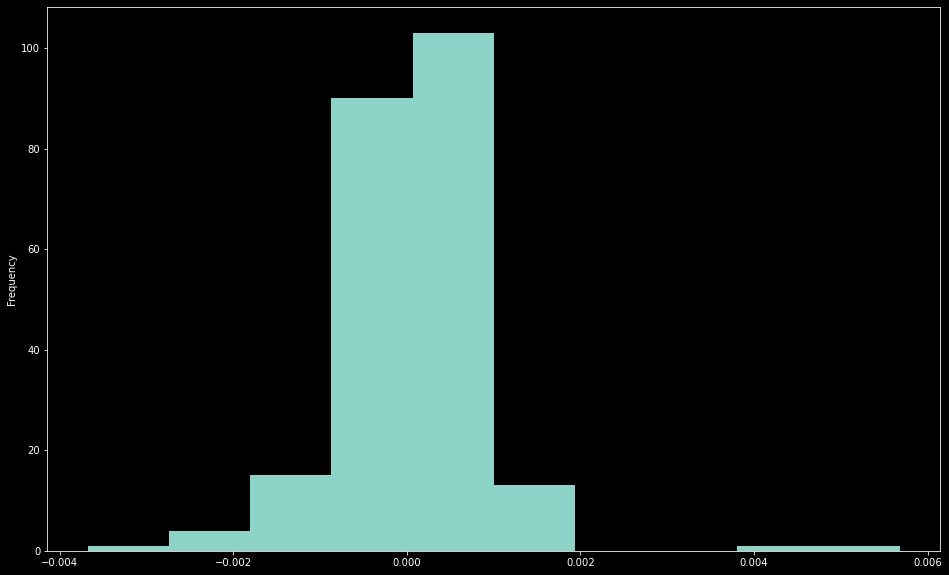

In [37]:
algo["ret_algo"].plot.hist()

In [39]:
tailrisk(spx[["ret_spx"]], 0.05, logret=False).T

,skew,kurtosis,var_0.05,cvar_0.05,drawdown,peak,trough,recovery
ret_spx,-0.5114,-1.7484,-0.0131,-0.0186,-0.0529,2021-09-02,2021-10-04,2021-10-21


In [40]:
comp, regs = portstats_bm(spx[["ret_spx"]], spx[["ret_spx"]], nper=252)
comp

,mean,std,sharpe,alpha,beta_ret_spx,r2,mae,treynor,info ratio
ret_spx,0.2536,0.1248,2.0332,0.0000,1.0000,1.0000,0.0000,0.2536,2.4281


In [55]:
comp, regs = portstats_bm(algo[["ret_algo"]], temp_ret[["IEF_RET"]], nper=252)
comp

,mean,std,sharpe,alpha,beta_IEF_RET,r2,mae,treynor,info ratio
ret_algo,0.0191,0.0135,1.4197,0.0197,0.0117,0.0021,0.0197,1.6348,1.4609


In [57]:
sum(results["Position"]==1) / len(results)

0.05197167248297734

In [61]:
print(cons["VOLUME"].min(), cons["VOLUME"].mean())

1 20296.753032249264


In [67]:
cons["VOLUME"].mean()

20296.753032249264